# データを統計量で記述する

## 平均を求める

In [20]:
import unittest

'''
平均を計算
'''
def calculate_mean(numbers): 
    s = sum(numbers)
    N = len(numbers)
    mean = s / N

    return mean


class TestCalculateMean(unittest.TestCase):
    
    def test_01(self):
        donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
        mean = calculate_mean(donations)
        N = len(donations)
        self.assertEqual(mean, 477.75)
        self.assertEqual(N, 12)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


## 中央値を求める

In [21]:
import unittest

'''
中央値を計算
'''
def calculate_median(numbers):
    N = len(numbers)
    numbers.sort()

    if N % 2 == 0:
        m1 = N / 2
        m2 = (N / 2) + 1
        m1 = int(m1) - 1
        m2 = int(m2) - 1
        median = (numbers[m1] + numbers[m2]) / 2
    else:
        m = (N + 1) / 2
        m = int(m) - 1
        median = numbers[m]

    return median


class TestListCalculateMedian(unittest.TestCase):
    def test_01(self):
        donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
        median = calculate_median(donations)
        N = len(donations)
        self.assertEqual(median, 500)
        
    def test_02(self):
        donations = [60, 70, 100, 900]
        median = calculate_median(donations)
        N = len(donations)
        self.assertEqual(median, 85)
        
    def test_03(self):
        donations = [60, 70, 100]
        median = calculate_median(donations)
        N = len(donations)
        self.assertEqual(median, 70)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.......
----------------------------------------------------------------------
Ran 7 tests in 0.006s

OK


## 最頻値を求め度数分布表を作る
### 一番多い要素を見つける

In [22]:
from collections import Counter

simplelist = [4, 2, 1, 3, 4]
c = Counter(simplelist)
print(c.most_common())
print(c.most_common(1))
print(c.most_common(2))

mode = c.most_common(1)
print(mode)
print(mode[0][0])


[(4, 2), (2, 1), (1, 1), (3, 1)]
[(4, 2)]
[(4, 2), (2, 1)]
[(4, 2)]
4


### 最頻値を探す

In [23]:
import unittest

'''
最頻値を計算
'''
def calculate_mode(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]


class TestListCalculateMode(unittest.TestCase):
    def test_01(self):
        scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 15, 6, 7, 8, 6, 1, 10]
        mode = calculate_mode(scores)
        self.assertEqual(mode, 9)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


........
----------------------------------------------------------------------
Ran 8 tests in 0.008s

OK


In [24]:
import unittest

'''
数のリストに複数の最頻値があるときに最頻値を計算
'''
def calculate_modes(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()
    max_count = numbers_freq[0][1]

    modes = []
    for num in numbers_freq:
        if num[1] == max_count:
            modes.append(num[0])
    return modes


class TestListCalculateModes(unittest.TestCase):
    def test_01(self):
        scores = [5, 5, 5, 4, 4, 4, 9, 1, 3]
        modes = calculate_modes(scores)
        self.assertEqual(modes, [5, 4])


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.........
----------------------------------------------------------------------
Ran 9 tests in 0.005s

OK


### 度数分布を作る


| 点数 | 頻度 |
| - | - |
| 1 | 2 |
|2|1|
|4|1|
|5|2|
|6|3|
|7|2|
|8|2|
|9|5|
|10|2|


In [25]:
"""
数のリストの度数分布表
"""
def frequency_table(numbers):
    table = Counter(numbers)
    print('Number\tFrequency')
    
    for number in table.most_common():
        print('{0}\t{1}'.format(number[0], number[1]))


if __name__ == '__main__':
    scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
    frequency_table(scores)


Number	Frequency
9	5
6	3
7	2
8	2
10	2
5	2
1	2
2	1
4	1


In [26]:
"""
数のリストの度数分布表
数の順に表示するよう修正
"""
def frequency_sorted_table(numbers):
    table = Counter(numbers)
    numbers_freq = table.most_common()
    numbers_freq.sort()
    
    print('Number\tFrequency')
    for number in numbers_freq:
        print('{0}\t{1}'.format(number[0], number[1]))
    

if __name__ == '__main__':
    scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
    frequency_sorted_table(scores)

Number	Frequency
1	2
2	1
4	1
5	2
6	3
7	2
8	2
9	5
10	2


## 散らばりを測る
### 数集合の範囲を求める

In [27]:
import unittest

'''
範囲を決める
'''
def find_range(numbers):
    lowest = min(numbers)
    highest = max(numbers)
    f = highest - lowest

    return lowest, highest, f


class TestFindRange(unittest.TestCase):
    def test_01(self):
        donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
        lowest, highest, r = find_range(donations)
        self.assertEqual(lowest, 60)
        self.assertEqual(highest, 1200)
        self.assertEqual(r, 1140)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..........
----------------------------------------------------------------------
Ran 10 tests in 0.007s

OK


### 分散と標準偏差を求める

$\frac{\sum(x_i - x_{avg})^2}{n}$

In [28]:
import unittest

'''
数のリストの分散と標準偏差を求める
'''
def calculate_variance(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s / N

    diff = []
    for num in numbers:
        diff.append(num - mean)

    squared_diff = []
    for d in diff:
        squared_diff.append(d ** 2)
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff / len(numbers)
    return variance


class TestCalculateVariance(unittest.TestCase):
    def test_01(self):
        donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
        variance = calculate_variance(donations)
        self.assertEqual(variance, 141047.35416666666)
        std = variance ** 0.5
        self.assertEqual(std, 375.5627166887931)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..........
----------------------------------------------------------------------
Ran 10 tests in 0.007s

OK


## ２つのデータセットの相関を計算する
### 相関係数を計算する

$\frac{n\sum xy - \sum x\sum y}{\sqrt{n \sum x^2 -(\sum x)^2(n\sum y^2 - (\sum y)^2)}}$

$\sum xy$　2つの数集合$x$と$y$の個別要素の積和 

$\sum x$　 集合$x$の数の和 

$\sum y$　 集合$y$の数の和 

$(\sum x)^2$　集合$x$の数の和の2乗 

$(\sum y)^2$　集合$y$の数の和の2乗 

$\sum x^2$　 集合$x$の数の和の2乗 

$\sum y^2$　 集合$y$の数の和の2乗

In [29]:
import unittest

'''
相関係数を計算するプログラム
'''
def find_corr_x_y(x, y):
    n = len(x)
    # 積の和を求める
    prod = []
    for xi, yi in zip(x, y):
        prod.append(xi * yi)
    sum_prod_x_y = sum(prod)
    sum_x = sum(x)
    sum_y = sum(y)
    squared_sum_x = sum_x ** 2
    squared_sum_y = sum_y ** 2
    x_square = []
    for xi in x:
        x_square.append(xi ** 2)
    # 和を求める
    x_square_sum = sum(x_square)
    y_square = []
    for yi in y:
        y_square.append(yi ** 2)
    # 和を求める        
    y_square_sum = sum(y_square)
    # 式を使って相関を計算
    numerator = n * sum_prod_x_y - sum_x * sum_y
    denominatior_term1 = n * x_square_sum - squared_sum_x
    denominatior_term2 = n * y_square_sum - squared_sum_y
    denominator = (denominatior_term1*denominatior_term2)**0.5
    correlation = numerator/denominator
    
    return correlation


class TestFindCorr(unittest.TestCase):
    def test_01(self):
        x = [1, 2, 3]
        y = [1, 2, 3]
        corr = find_corr_x_y(x, y)
        self.assertEqual(corr, 1)

        x = [1, 2, 3]
        y = [-1, -2, -3]
        corr = find_corr_x_y(x, y)
        self.assertEqual(corr, -1)

        x = [1, 2, 3]
        y = [1, -2, 3]
        corr = find_corr_x_y(x, y)
        self.assertEqual(corr, 0.39735970711951313)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..........
----------------------------------------------------------------------
Ran 10 tests in 0.006s

OK


## 散布図

In [30]:
import sys
!{sys.executable} -m pip install seaborn

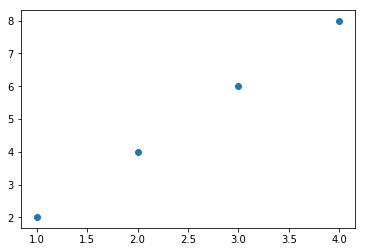

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.scatter(x, y)
plt.show()

[アンスコムの4つ組](http://blog.livedoor.jp/oyajieng_memo/archives/1677707.html)

In [32]:
import sys
!{sys.executable} -m pip install numpy pandas

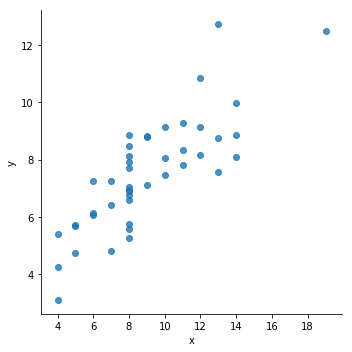

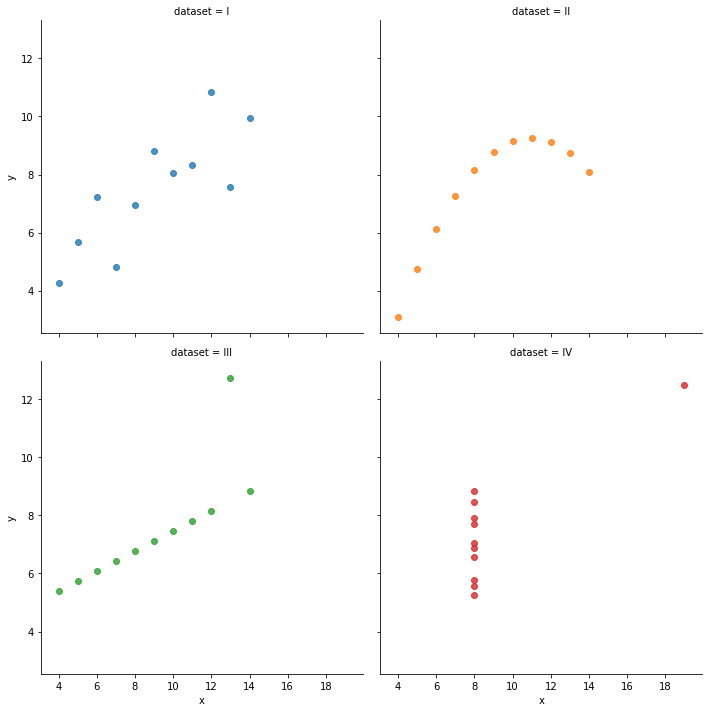

In [33]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
anscombe=sns.load_dataset("anscombe", engine="python")
sns.lmplot(x="x",y="y",data=anscombe,fit_reg=False)
plt.show()

sns.lmplot(x="x",y="y",data=anscombe,fit_reg=False,hue="dataset",col="dataset",col_wrap=2)
plt.show()

## ファイルからデータを読み込む
### テキストファイルからデータを読み込む

In [34]:
import unittest


def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s / N

    return mean

'''
ファイルに格納した平均を計算
'''
def read_data(filename):
    numbers = []
    with open(filename) as f:
        for line in f:
            numbers.append(float(line))
        return numbers


class TestReadData(unittest.TestCase):
    def test_01(self):
        data = read_data('mydata.txt')
        mean = calculate_mean(data)
        self.assertEqual(mean, 477.75)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..........
----------------------------------------------------------------------
Ran 10 tests in 0.005s

OK


### CSVファイルからデータを読み込む

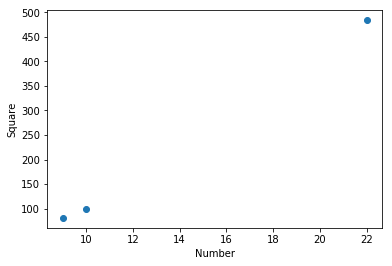

In [35]:
import seaborn as sns

'''
CSVファイルからデータを読み込む
'''
import csv
import matplotlib.pyplot as plt

def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('Number')
    plt.ylabel('Square')
    plt.show()

def read_csv(filename):
    numbers = []
    squared = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            numbers.append(int(row[0]))
            squared.append(int(row[1]))
    return numbers, squared

if __name__ == '__main__':
    numbers, squared = read_csv('numbers.csv')
    scatter_plot(numbers, squared)


[https://www.google.com/trends/correlate/](https://www.google.com/trends/correlate/)

Highest correlation: 0.9643403143357506


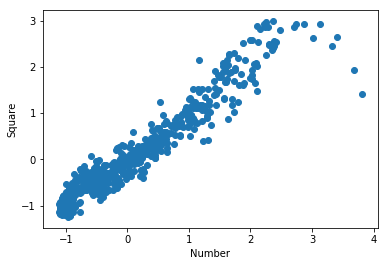

In [36]:
import seaborn as sns

def read_csv(filename):

    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)

        summer = []
        highest_correlated = []
        for row in reader:
            summer.append(float(row[1]))
            highest_correlated.append(float(row[2]))

    return summer, highest_correlated

def scatter_plot(x,y):
    plt.scatter(x,y)
    plt.xlabel('Number')
    plt.ylabel('Square')
    plt.show()
    
def find_corr_x_y(x,y):
    n = len(x)
    # 積の和を求める
    prod = []
    for xi,yi in zip(x,y):
        prod.append(xi*yi)
    sum_prod_x_y = sum(prod)
    sum_x = sum(x)
    sum_y = sum(y)
    squared_sum_x = sum_x**2
    squared_sum_y = sum_y**2
    x_square = []
    for xi in x:
        x_square.append(xi**2)
    # 和を求める
    x_square_sum = sum(x_square)
    y_square=[]
    for yi in y:
        y_square.append(yi**2)
    # 和を求める
    y_square_sum = sum(y_square)

    # 式を使って相関を計算
    numerator = n*sum_prod_x_y - sum_x*sum_y
    denominatior_term1 = n*x_square_sum - squared_sum_x
    denominatior_term2 = n*y_square_sum - squared_sum_y
    denominator = (denominatior_term1*denominatior_term2)**0.5
    correlation = numerator/denominator

    return correlation    


if __name__ == '__main__':
    summer, highest_correlated = read_csv('correlate-summer.csv')
    corr = find_corr_x_y(summer, highest_correlated)
    print('Highest correlation: {0}'.format(corr))
    scatter_plot(summer, highest_correlated)
